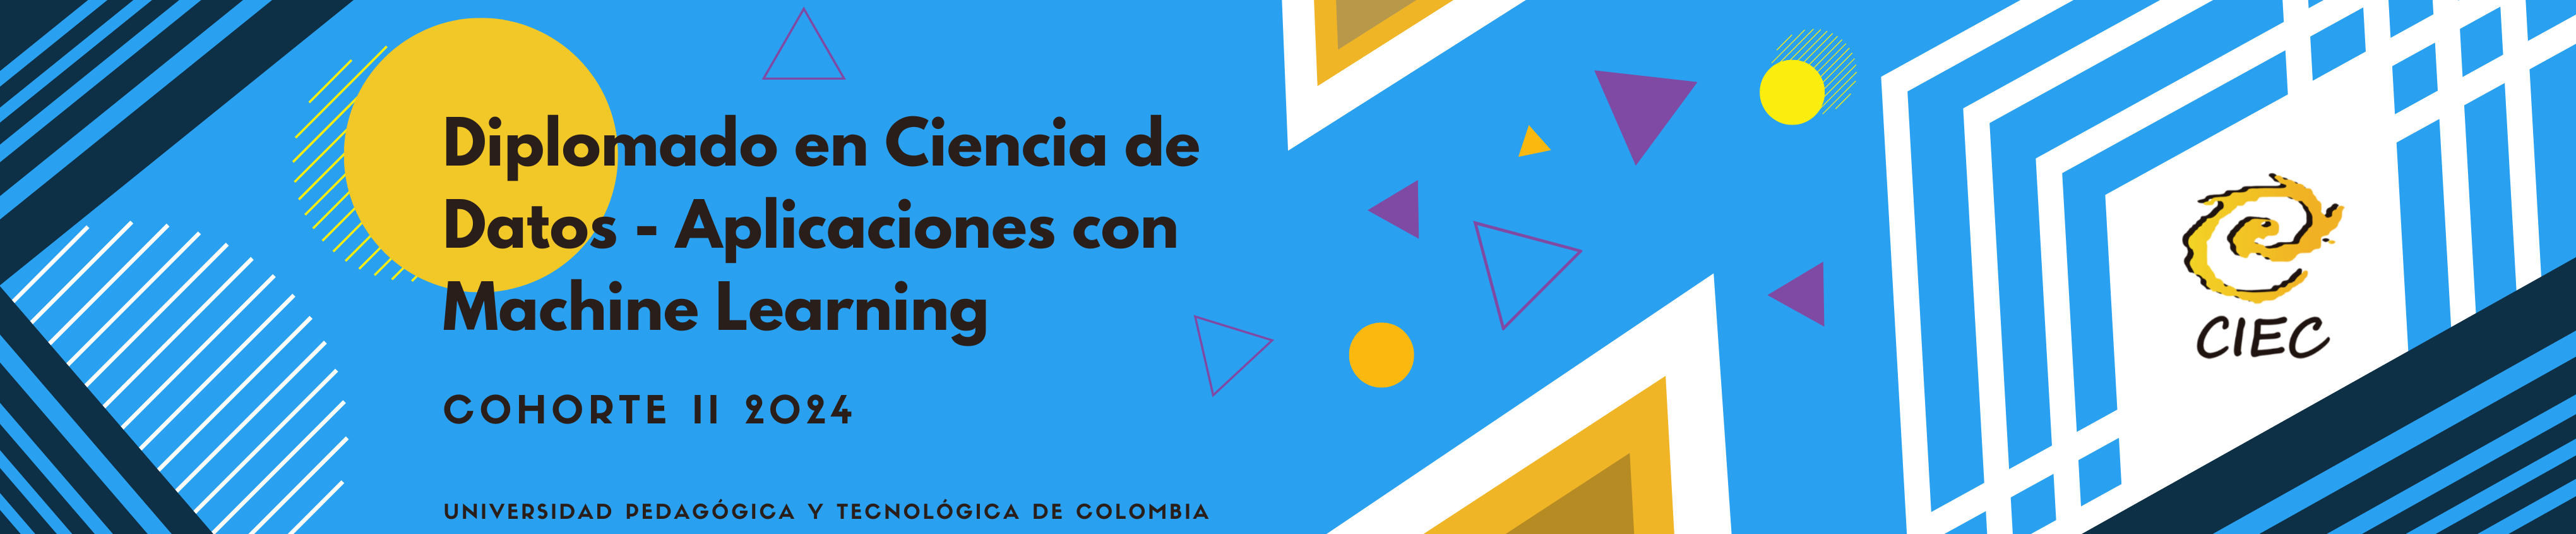

<!-- Main Title -->

**<h1 style="color: #FECB05; text-align: center;"> Introducción al Aprendizaje Supervisado: Regresión Lineal </h1>**

---

**<h2 style="color: #007ACC;">Autores</h2>**

- [Andrés Felipe Flórez Olivera](https://www.linkedin.com/in/felipeflorezo/)

---

<!-- Table of Contents -->
**<h2 style="color: #007ACC;">Tabla de contenido</h2>**

- [<span style="color: #005C99;">1. Atributos</span>](#section1)
- [<span style="color: #005C99;">2. Función train_test_split</span>](#section2)
- [<span style="color: #005C99;">3. Regresión Lineal Simple y Múltiple</span>](#section3)


---

**<h2 style="color: #007ACC;">Introducción</h2>**

La **regresión** es una técnica estadística y de aprendizaje automático utilizada para modelar la relación entre una variable dependiente (o de respuesta) y una o más variables independientes (o explicativas). Su objetivo principal es predecir valores de la variable dependiente basándose en los datos observados y entender cómo las variables independientes influyen en ella. 

La **regresión lineal** es un tipo específico de regresión que asume una relación lineal entre las variables. Esto significa que los cambios en la variable dependiente se modelan como una combinación lineal de las variables independientes. Se expresa matemáticamente como:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n + \epsilon
$$

donde $y$ es la variable dependiente, $x_i$ son las variables independientes, \(\beta_i\) son los coeficientes que representan la magnitud y dirección del efecto de cada $x_i$, y $\epsilon$ es el término de error.

### Tipos de regresiones lineales
1. **Regresión lineal simple**: Utiliza una sola variable independiente para predecir la variable dependiente. Es ideal para relaciones directas y sencillas.
2. **Regresión lineal múltiple**: Involucra varias variables independientes para modelar relaciones más complejas.
3. **Regresión lineal regularizada**:
   - **Lasso (L1)**: Introduce una penalización basada en la suma de los valores absolutos de los coeficientes, favoreciendo la selección de variables al reducir algunos coeficientes a cero.
   - **Ridge (L2)**: Aplica una penalización basada en la suma de los cuadrados de los coeficientes, lo que reduce la magnitud de todos los coeficientes pero no los elimina.
   - **Elastic Net**: Combina las penalizaciones L1 y L2.

### ¿Por qué es un modelo tan famoso?
1. **Simplicidad**: Es fácil de entender e interpretar, lo que lo hace ideal para explorar relaciones entre variables.
2. **Versatilidad**: Aunque sencillo, puede extenderse a problemas complejos mediante técnicas como la regularización o la inclusión de variables polinómicas.
3. **Base teórica sólida**: Se fundamenta en principios estadísticos bien establecidos, lo que facilita su validación y evaluación.
4. **Eficiencia computacional**: Es rápido de implementar y entrenar, incluso con grandes conjuntos de datos.
5. **Aplicaciones amplias**: Se usa en diversos campos como economía, biología, ingeniería y ciencias sociales, donde las relaciones lineales son comunes o una buena aproximación inicial.

Estos atributos hacen de la regresión lineal una herramienta esencial en la analítica de datos y el aprendizaje automático.

---

# <!-- Section 1 -->
**<h2 id="section1" style="color: #007ACC;">1. Atributos</h2>**


In [1]:
# Las típicas librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Control autónomo de las advertencias
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Número de puntos
n = 500

# Variables predictoras con distribución uniforme
X = np.linspace(-2, 3, n)

# Relación ideal entre X e y
y_real = 3*X - 2

# Añadimos ruido gaussiano aleatorio para simular entornos más realistas.
y = y_real + 1.0*np.random.randn(n)
# Este ruido sigue una distribución normal con media 0 y desviación estándar 1

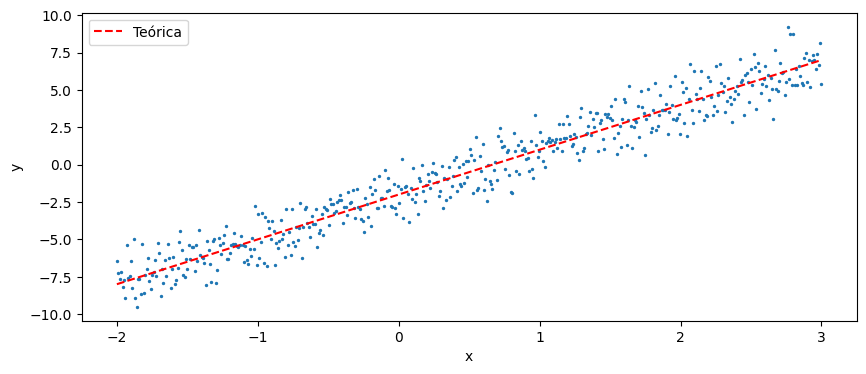

In [3]:
# Plot para observar la recta y la distribución de puntos aleatorios generados

plt.figure(figsize=(10, 4))
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Vamos a entrenar todos los modelos a la vez. Pero antes, no nos olvidemos del `train_test_split`

# <!-- Section 1 -->
**<h2 id="section1" style="color: #007ACC;">2. Función train_test_split</h2>**

La función `train_test_split` de la librería `scikit-learn` en Python se utiliza para dividir un conjunto de datos en dos subconjuntos: uno para entrenamiento y otro para pruebas. Esto permite entrenar el modelo en una parte de los datos y evaluar su rendimiento en datos que no ha visto antes, proporcionando una medida más precisa de su capacidad de generalización.

### Sintaxis básica:
```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test Aze=0.2, random_ Ba
# con A (float entre 0 a 1, e.g. 0.2), recordemos que 0.7 funciona bien para hacer que el modelo generalice bien (conjuntos de datos muy grandes), evitando sobreajuste.
# Recordemos que 0.8 funciona bien para hacer que el modelo sea óptimo (poca capacidad de generalización) es ideal para conjuntos de datos pequeños, evitando subajuste.
# En conjuntos Big Data, por lo general se usan distribuciones tipo 95-99% para train y 1% o menor a 1% para test

# con B (int entre 0 a 100, e.g. 42), recordemos la aleatoridad: distribución, entropía, inicialización de condicioneste=42)
```

### Parámetros importantes:
1. **`X`**: Son las características (o variables predictoras) que usas para entrenar el modelo.
2. **`y`**: Es el objetivo o las etiquetas correspondientes que quieres predecir (variable dependiente).
3. **`test_size`**: Es la proporción del conjunto de datos que se asignará para pruebas. Por ejemplo, `test_size=0.2` significa que el 20% de los datos se usará para pruebas y el 80% restante para en # con A (float entre 0 a 1, e.g. 0.2), recordemos que 0.7 funciona bien para hacer que el modelo generalice bien (conjuntos de datos muy grandes), evitando sobreajuste. Recordemos que 0.8 funciona bien para hacer que el modelo sea óptimo (poca capacidad de generalización) es ideal para conjuntos de datos pequeños, evitando subajuste. En conjuntos Big Data, por lo general se usan distribuciones tipo 95-99% para train y 1% o menor a 1% para testt5enamiento.
4. **`random_state`**: Es un número entero que se usa como semilla para asegurar que las divisiones de los datos sean reproducibles. Si especificas un valor para `random_state`, obtendrás la misma división de datos cada vez que ejecutes el código.

### Retorno:
- **`X_train`**: Subconjunto de las características (variables predictoras) para entrenamiento.
- **`X_test`**: Subconjunto de las características para pruebas.
- **`y_train`**: Subconjunto de las etiquetas o variables objetivo para entrenamiento.
- **`y_test`**: Subconjunto de las etiquetas o variables objde su capacidad de generalización.

In [4]:
# División
from sklearn.model_selection import train_test_split

X = X.reshape(-1,1)
"""
La función reshape(-1,1) cambia la estructura de X a una matriz de dos dimensiones, donde cada fila es un valor de entrada y la única columna representa las características.

-1 indica que el número de filas se ajustará automáticamente en función de la cantidad de datos.
1 indica que se espera una columna.
Este paso es necesario si X es un arreglo unidimensional (vector) y se requiere transformarlo en una matriz de forma (n_samples, 1) para ajustarse al formato esperado por los modelos de scikit-learn.

"""
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
#Observamos las dimensiones resultantes:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 1) (350,) (150, 1) (150,)


# <!-- Section 3 -->
**<h2 id="section3" style="color: #007ACC;">3. Regresión Lineal Simple y Múltiple</h2>**


Definimos el modelo y entrenamos

In [5]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [6]:
linear_model.fit(X_train, y_train)

LinearRegression()

Veamos qué aprendió el modelo
La regresión lineal obtiene la pendiente y la ordenada al origen.
Recordemos que habíamos definido:
* Relación ideal entre X e y:
  y_real = 3*X - 2

In [7]:
print(linear_model.coef_, linear_model.intercept_)

[2.9192179] -1.908460613380418


¿Están cerca de los valores reales?

Así como los clasificadores obtienen fronteras de decisión que separan los datos, los regresores obtienen curvas que intentan aproximar los datos lo mejor posible. Veamos cómo son estas curvas para cada regresor.

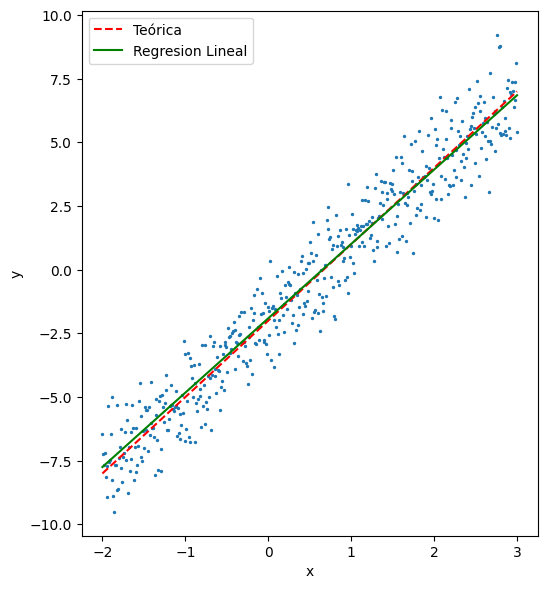

In [8]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 3, 1)
plt.scatter(X, y, s=2)
plt.plot(X, y_real, '--', label='Teórica', c='r')
plt.plot(X, linear_model.predict(X), label='Regresion Lineal', c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Veamos ahora cómo son los errores obtenidos. Vamos a hacer todo en la misma celda, pero tiene tres componentes importantes:
1. El cálculo del RMSE (métrica elegida, podría ser otra) para cada conjunto (Train y Test).
1. Un gráfico de dispersión de $y$ vs $y_{predicted}$ para el conjunto de Test.
1. El histograma de los errores ($y - y_{predicted}$) para cada conjunto.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 1.0404086683830995
Raíz del error cuadrático medio en Test: 1.1460730252805253


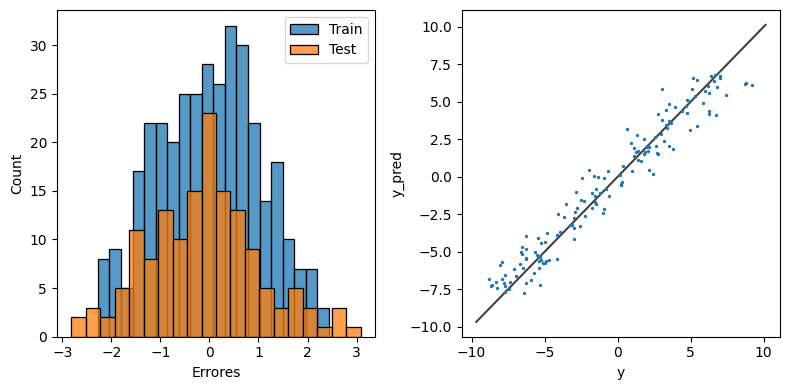

In [9]:
import seaborn as sns
from sklearn.metrics import mean_squared_error


modelos = ['Regresión lineal']

for i, model in enumerate([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(y_train - y_train_pred, bins=20, label='Train')
    sns.histplot(y_test - y_test_pred, bins=20, label='Test')
    plt.xlabel('Errores')
    plt.legend()


    ax = plt.subplot(1, 2, 2)
    ax.scatter(y_test, y_test_pred, s=2)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()])
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y')
    plt.ylabel('y_pred')

    plt.tight_layout()
    plt.show()

Buena generalización

Las visualizaciones de su modelo de regresión lineal proporcionan información clave sobre su rendimiento:

1. Histograma de errores:
   - La distribución de los residuos (errores) de los conjuntos de entrenamiento y prueba está bastante centrada en torno a 0, lo que indica que las predicciones del modelo son insesgadas.
   - El conjunto de entrenamiento (azul) muestra errores más concentrados en torno a 0, lo que sugiere un mejor rendimiento en los datos de entrenamiento. El conjunto de prueba (naranja) tiene errores más dispersos, pero sigue estando razonablemente cerca de los errores de entrenamiento, lo que sugiere que el modelo generaliza bien y no hay un sobreajuste significativo.
   
2. Diagrama de dispersión de predicciones:
   - El gráfico de dispersión muestra los valores predichos (`y_pred`) frente a los valores reales (`y`) para el conjunto de pruebas. La mayoría de los puntos se sitúan cerca de la línea negra diagonal, lo que indica una buena concordancia entre las predicciones y los resultados reales. Sin embargo, algunos puntos, especialmente en los extremos, se desvían de la línea, lo que refleja errores de predicción.

3. Valores RMSE:
   - Los valores del error cuadrático medio (RMSE) para los conjuntos de entrenamiento (0,968) y prueba (1,054) son muy parecidos, lo que confirma que el modelo tiene un rendimiento similar en ambos conjuntos, lo que indica que no hay sobreajustes ni infraajustes im más realista.

In [10]:
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = 4 * x1 - 2 * x2 + 7 + 0.4 * np.random.randn(n)

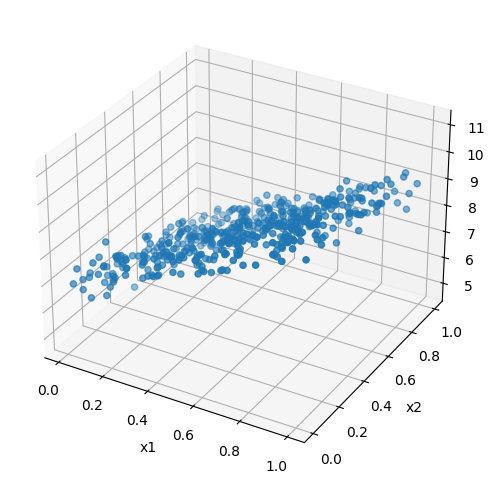

In [11]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig=None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y)

### Interpretación:


1. **Eje `x1` (Eje X)**:
   - Este eje representa la primera variable independiente (`x1`), cuyos valores fueron generados aleatoriamente entre 0 y 1 con la función `np.random.rand(n)`. En el contexto de tu modelo lineal, esta variable tiene un coeficiente positivo de 4, lo que significa que a medida que `x1` aumenta, el valor de `y` también tiende a aumentar, dado que su relación con `y` es directa.

2. **Eje `x2` (Eje Y)**:
   - El segundo eje representa la otra variable independiente (`x2`), que también fue generada aleatoriamente entre 0 y 1. En tu modelo, el coeficiente de `x2` es negativo (-2), lo que indica que a medida que `x2` aumenta, el valor de `y` tiende a disminuir, ya que la relación entre `x2` y `y` es inversa.

3. **Eje `y` (Eje Z)**:
   - Este eje representa la variable dependiente (`y`), que es una combinación lineal de `x1` y `x2` más una constante (7) y un término de ruido (`0.4 * np.random.randn(n)`). Los puntos en el gráfico son el resultado de la expresión `y = 4 * x1 - 2 * x2 + 7 + ruido`. Los valores de `y` dependen de las combinaciones de `x1` y `x2`, además de un componente aleatorio pequeño (el ruido), que introduce variabilidad en lridimensional. tridimensional.

Creamos los atributos y hacemos un `train_test_split`

In [12]:
X = np.vstack((x1, x2)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 2) (350,) (150, 2) (150,)



1. **Creación de la matriz de características `X`**:
   - `X = np.vstack((x1, x2)).T` combina las dos variables `x1` y `x2` en una sola matriz `X` con dos columnas. La función `np.vstack` apila las dos matrices una sobre la otra, y `T` transpone la matriz para que cada columna corresponda a una variable independiente. El resultado es que `X` tiene forma `(n, 2)`, donde `n` es el número de muestras, y 2 son las características (una columna para `x1` y otra para `x2% restante.
   
### Interpretación esperada de las dimensiones:
Si el número total de muestras es `n`, entonces:
- `X_train.shape` será `(0.7 * n, 2)` porque el 70% de las muestras van al conjunto de entrenamiento, y cada muestra tiene 2 características (`x1` y `x2`).
- `y_train.shape` será `(0.7 * n,)` ya que `y` es un vector con los valores correspondientes de la variable dependiente.
- `X_test.shape` será `(0.3 * n, 2)` para el conjunto de prueba, con el 30% de las muestras y 2 características.
- `y_test.shape` será `(0.3 * n,)` para el conjunto de prueba de la varrenamiento y prueba.

Definimos los modelos y entrenamos

In [13]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

Veamos qué aprendieron.

Será que la regresión lineal obtiene **las pendientes** y la ordenada al origen... (?)
Recordemos que:
y = 4 * x1 - 2 * x2 + 7 + 0.4 * np.random.randn(n)

In [14]:
print(linear_model.coef_, linear_model.intercept_)

[ 4.01427398 -1.94571768] 6.965279551342619


En este caso, la curva que aproxima a los datos no es más una recta, sino una superficie. La siguiente función nos ayuda a graficar.

In [15]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min, x2_max, N, regressor, ax=None, fig=None):
    x1 = np.linspace(x1_min, x1_max, N)
    x2 = np.linspace(x2_min, x2_max, N)
    X1, X2 = np.meshgrid(x1, x2)

    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)

    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(
        X1, X2, Y, cmap=cm.coolwarm,
        linewidth=0, antialiased=False, alpha=0.5
)

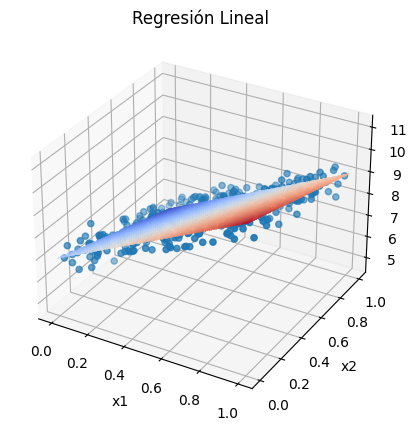

In [16]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

plt.tight_layout()
plt.show()


- **Eje X (`x1`)**: La primera variable independiente.
- **Eje Y (`x2`)**: La segunda variable independiente.
- **Eje Z (`y`)**: La variable dependiente que es una función de `x1` y `x2` con algo de ruido añadue has definido.

### Interpretación del gradiente de colores:

El gradiente de colores en el gráfico muestra cómo varía el valor de la variable dependiente `y` en función de `x1` y `x2`. Las zonas azules representan valores más bajos de `y`, asociados a bajos valores de `x1` o altos de `x2`, mientras que las zonas anaranjadas indican valores más altos de `y`, cuando `x1` aumenta o `x2` disminuye. El gradiente facilita la visualización de la relación lineal entre las variables, donde los puntos alrededor de la superficie representan los datos observados con un pequeño ruido.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.38286844971762735
Raíz del error cuadrático medio en Test: 0.34779492692274233


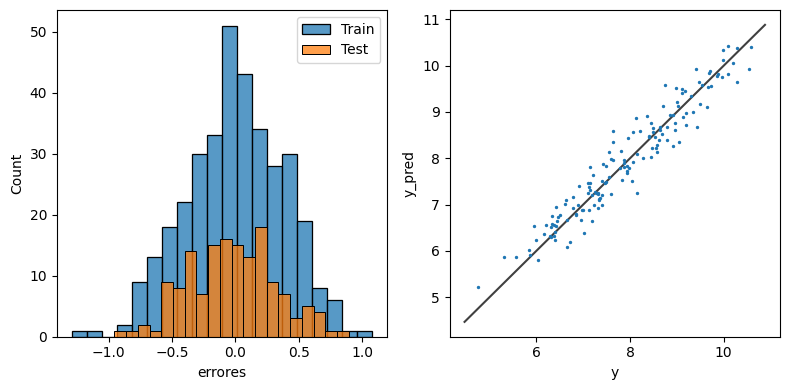

In [17]:
import seaborn as sns
from sklearn.metrics import mean_squared_error


modelos = ['Regresión lineal']

for i, model in enumerate([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(y_train - y_train_pred, bins=20, label='Train')
    sns.histplot(y_test - y_test_pred, bins=20, label='Test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()])
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y')
    plt.ylabel('y_pred')

    plt.tight_layout()
    plt.show()

### Conclusión:
El modelo de regresión lineal está generalizando bien, con errores reducidos y una buena correspondencia entre los valores predichos y reales. Los valores de RMSE muestran que el modelo es preciso tanto en el conjunto de entrenamiento como en el de prueba.

**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Andrés Felipe Florez Olivera

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---